In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats.weightstats as wsts
import statsmodels.stats.proportion as psts
import statsmodels.stats.multitest as msts

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True

В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:

- **state** — штат США
- **account_length** — длительность использования аккаунта
- **area_code** — деление пользователей на псевдорегионы, использующееся в телекоме
- **intl_plan** — подключена ли у пользователя услуга международного общения
- **vmail_plan** — подключена ли у пользователя услуга голосовых сообщений
- **vmail_message** — количество голосых сообщений, который пользователь отправил / принял
- **day_calls** — сколько пользователь совершил дневных звонков
- **day_mins** — сколько пользователь проговорил минут в течение дня
- **day_charge** — сколько пользователь заплатил за свою дневную активность
- **eve_calls, eve_mins, eve_charge** — аналогичные метрики относительно вечерней активности
- **night_calls, night_mins, night_charge** — аналогичные метрики относительно ночной активности
- **intl_calls, intl_mins, intl_charge** — аналогичные метрики относительно международного общения
- **custserv_calls** — сколько раз пользователь позвонил в службу поддержки
- **treatment** — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
- **mes_estim** — оценка интенсивности пользования интернет мессенджерами
- **churn** — результат оттока: перестал ли абонент пользоваться услугами оператора

In [2]:
raw = pd.read_csv('data/churn_analysis.csv', index_col=0)
raw.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [3]:
raw.churn.value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [4]:
df = raw.copy()

In [5]:
bool_convert1 = {'True.': True, 'False.': False}
bool_convert2 = {'yes': True, 'no': False}
df.churn = df.churn.map(bool_convert1)
df.vmail_plan = df.vmail_plan.map(bool_convert2)
df.intl_plan = df.intl_plan.map(bool_convert2)

In [6]:
df.churn.mean()

0.14491449144914492

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 22 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null bool
vmail_plan        3333 non-null bool
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
treatment         3333 non-null int64
mes_estim         3333 non-null float64
churn             3333 non-null bool
dtypes: bool(3), float64(9), int64(9), ob

In [8]:
del(raw)
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False


___
# 1 V
Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

In [9]:
contr_df = df[df.treatment == 1]

In [10]:
import itertools
states_pairs = list(itertools.combinations(contr_df.state.unique(), 2))

def check_ct(ct):
    ct_check = ct.copy()
    for i in ct.index:
        for j in ct.columns:
            ct_check.loc[i, j] = (ct.loc[i].sum() * ct[j].sum()) / ct.sum().sum()
    return (ct_check < 5).values.mean()

In [79]:
p_val_states = []
for comb in states_pairs:
    ctab = pd.crosstab(
        contr_df[contr_df.state.isin(comb)]['state'],
        contr_df.churn)

#     if ctab.sum().sum() < 40:
#         print(comb, 'Num of observed objects less than 40')
#     elif check_ct(ctab) < 0.2:
#         print(comb, 'Small obs')
#     else:
    p_val = sts.chi2_contingency(ctab, correction=False)[1]
    p_val_states.append(p_val)

p_val_states_chi2_nocorr = np.array(p_val_states)

In [80]:
p_val_states_chi2_nocorr[p_val_states_chi2_nocorr < 0.05].shape

(34,)

___
# 2 V
Какие проблемы Вы видите в построении анализа из первого вопроса? Отметьте все верные утверждения.

- [X] Интерпретация числа достигаемых уровней значимости, меньших 
α=0.05, некорректна, поскольку не сделана поправка на множественную проверку гипотез.
- [ ] Поправку на множественную проверку здесь применять нельзя — она используется только для группы критериев, проверяющих равенство средних (типа t-критерия). Критерий xи-квадрат не принадлежит этому семейству, поэтому поправка не нужна.
- [ ] Хи-квадрат используется для того, чтобы сравнить выборку с некоторым воздействием (treatment) и выборку без этого воздействия (control). Мы же в первом задании сравнивали штаты, используя данные только control группы. Для данных только из control группы использование xи-квадрат неправомерно.
- [ ] Анализ нужно было начинать с применения xи-квадрат к таблице сопряженности, в которой присутствовали сразу все возможные штаты. Достигаемой уровень значимости такой проверки = 0.7, что дает нам гарантию, что нет ни одной пары штатов, в которых отличие в соотношениях ушедших и оставшихся клиентов статистически значимо.
- [X] Применение критерия xи-квадрат для этих данных не обосновано, потому что не выполняются условия, при которых этот критерий дает правильные результаты.

___
# 3 V

В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность. Эта поправка заключается в вычитании константы 0.5 из каждого модуля разности наблюденного $O_i$ и ожидаемого $E_i$ значений, то есть, статистика с такой поправкой выглядит так:
$$\chi^2_{Yates} = \sum_{i=1}^N \frac{(|O_i - E_i| - 0.5)^2}{E_i}$$

Такая поправка, как несложно догадаться по формуле, как правило, уменьшает значение статистики 
$\chi^2$, то есть увеличивает достигаемый уровень значимости.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

**Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией и сравните полученные результаты, отметив все верные варианты.**

- [X] Количество достигаемых уровней значимости, меньших, чем 0.05, в точности равно нулю. То есть поправка увеличила достигаемые уровни значимости настолько, что больше ни одно из значений достигаемого уровня значимости не попадает в диапазон от 0 до 0.05.
- [ ] Поправка Йетса на непрерывность всегда увеличивает значение достигаемого уровня значимости, поэтому все получившиеся значения достигаемого уровня значимости строго больше или равны таковым значениям при отсутствии этой поправки.
- [ ] Количество достигаемых уровней значимости, меньших, чем 0.05, почти не изменилось, нельзя сказать, что введенная поправка сильно поменяла достигаемые уровни значимости.
- [X] Достигаемые уровни значимости на наших данных, полученные с помощью критерия хи-квадрат с поправкой Йетса, в среднем получаются больше, чем соответствующие значения без поправки.

In [14]:
p_val_states = []
for comb in states_pairs:
    ctab = pd.crosstab(
        contr_df[contr_df.state.isin(comb)]['state'],
        contr_df.churn)
    p_val = sts.chi2_contingency(ctab, correction=True)[1]
    p_val_states.append(p_val)
p_val_states_corr = np.array(p_val_states)

In [15]:
p_val_states_corr[p_val_states_corr < 0.05]

array([], dtype=float64)

In [84]:
p_val_states_corr.mean() > p_val_states_chi2_nocorr.mean()

True

___
# 4 V
Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Пусть у нас есть таблица сопряженности 2x2:

|__________| Group 1 | Group 2 | $\Sigma$ |
|----------|---------|---------|----------|
| Affect 1 |   a     |b        |a+b       |
|Affect 2  | c       | d       | c + d    |
|$\Sigma$  | a + c   | b + d   | n = a + b + c + d|

Тогда вероятность получить именно такие a, b, c, d при фиксированных значениях сумм по строкам и по столбцам задается выражением:
$$p = \frac{\left(\begin{array}{c} a+b \\ a \end{array}\right) \left(\begin{array}{c} c+d \\ c \end{array}\right)}{\left(\begin{array}{c} n \\ a+c \end{array}\right)} = 
\frac{(a+b)!(c+d)!(a+c)!(b+d)!}{a!\quad b!\quad c!\quad d!\quad n!}$$

В числителе этой дроби стоит суммарное количество способов выбрать a и c из a+b и c+d соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца a+c из общего количества рассматриваемых объектов n.

Чтобы посчитать достигаемый уровень значимости критерия Фишера, нужно перебрать все возможные значения a,b,c,d, в клетках этой таблицы так, чтобы построковые и постолбцовые суммы не изменились. Для каждого такого набора a,b,c,d нужно вычислить значение $p_i$ по формуле выше и просуммировать все такие значения, которые меньше или равны p, которое мы вычислили по наблюдаемым значениям a,b,c,d.

Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы n×m.

**Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.**

Точный критерий Фишера удобно вычислять с помощью функции
    
    scipy.stats.fisher_exact

- [X] Точный критерий Фишера всегда лучше, чем критерий xи-квадрат, потому что не использует аппроксимацию дискретного распределения непрерывным. Однако при увеличении размера выборки его преимущества по сравнению с критерем xи-квадрат уменьшаются, в пределе достигая нуля.
- [ ] Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем большие, чем xи-квадрат с поправкой Йетса
- [ ] Точный критерий Фишера точно также, как и критерий xи-квадрат, нельзя использовать, если наблюдений < 40 и если ожидаемое значение меньше 5 больше чем в 20% ячейках.
- [X] Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем значительно большие, чем xи-квадрат без поправки
- [ ] Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие, чем xи-квадрат без поправки
- [X] Точный критерий Фишера на наших данных дает значения достигаемого уровня значимости в среднем меньшие, чем xи-квадрат с поправкой Йетса

In [17]:
p_val_states = []
for comb in states_pairs:
    ctab = pd.crosstab(
        contr_df[contr_df.state.isin(comb)]['state'],
        contr_df.churn)
    p_val = sts.fisher_exact(ctab)[1]
    p_val_states.append(p_val)
p_val_states_fisher = np.array(p_val_states)

In [18]:
p_val_states_fisher[p_val_states_fisher < 0.05]

array([0.03284029, 0.03073018, 0.04338154, 0.02696284, 0.03576762,
       0.02905702, 0.04214559, 0.04967593, 0.04112181, 0.03577186])

In [19]:
p_val_states_fisher[:10]

array([0.13833322, 0.03284029, 0.44008347, 0.74338898, 0.74710798,
       0.14422949, 0.51375762, 0.15064516, 0.05919441, 1.        ])

In [20]:
print(f'Chi2 no correction: {p_val_states_chi2_nocorr.mean():.4f}')
print(f'Chi2 correction: {p_val_states_corr.mean():.4f}')
print(f'Fisher: {p_val_states_fisher.mean():.4f}')

Chi2 no correction: 0.5090
Chi2 correction: 0.6641
Fisher: 0.6483


In [21]:
import bootstrap as boot
fisher_p_means = boot.get_bootstrap_samples(p_val_states_fisher, 1000)
fisher_p_means = np.mean(fisher_p_means, axis=1)
chi2_nocorr_p_means = boot.get_bootstrap_samples(p_val_states_chi2_nocorr, 1000)
chi2_nocorr_p_means = np.mean(chi2_nocorr_p_means, axis=1)
chi2_corr_p_means = boot.get_bootstrap_samples(p_val_states_corr, 1000)
chi2_corr_p_means = np.mean(chi2_corr_p_means, axis=1)

In [22]:
wsts.DescrStatsW(fisher_p_means).tconfint_mean()

(0.6474340581688623, 0.6485595765331121)

In [23]:
wsts.DescrStatsW(chi2_nocorr_p_means).tconfint_mean()

(0.5086031278628773, 0.5098718207646753)

In [24]:
wsts.DescrStatsW(chi2_corr_p_means).tconfint_mean()

(0.6631601111596351, 0.6640811337628766)

___
# 5 V
Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков `day_calls` и `mes_estim`. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

Отметьте все верные утверждения.

- [ ] Все варианты неверны, потому что значимость корреляции Пирсона можно оценивать только для нормального распределения, как и упоминалось в лекциях.
- [ ] Корреляция Пирсона имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 не значимо.
- [X] Корреляция Пирсона имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.
- [ ] Корреляция Пирсона имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 не значимо.
- [ ] Корреляция Пирсона имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.

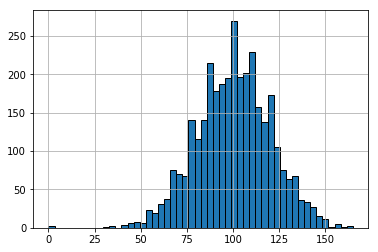

In [25]:
df.day_calls.hist(bins=50);

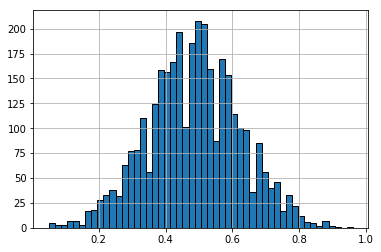

In [26]:
df.mes_estim.hist(bins=50);

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


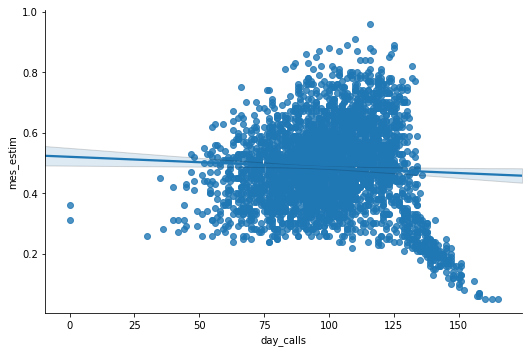

In [27]:
sns.lmplot(data=df, x='day_calls', y='mes_estim', aspect=1.5);

In [28]:
sts.pearsonr(df.day_calls, df.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

___
# 6 V
Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

Отметьте все верные утверждения.

- [X] Корреляция Спирмена имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.
- [ ] Корреляция Спирмена имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 значимо.
- [ ] Корреляция Спирмена имеет отрицательный знак, и отличие корреляции от нуля на уровне доверия 0.05 не значимо.
- [ ] Корреляция Спирмена тут неприменима, поскольку речь идет о непрерывных величинах, а корреляция Спирмена применяется к выборочным рангам двух выборок.
- [ ] Корреляция Спирмена имеет положительный знак, и отличие корреляции от нуля на уровне доверия 0.05 не значимо.

In [29]:
sts.spearmanr(df.day_calls, df.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

___
# 7 V
Как можно интерпретировать полученные значения коэффициентов корреляции и достигаемые уровни значимости при проверки гипотез о равенстве нулю этих коэффициентов?

- [ ] Не стоит ориентироваться на значение корреляции Спирмена, потому что корреляцию Спирмена можно считать только тогда, когда оба признака дискретные и между значениями можно установить строгий порядок.
- [ ] Предположение нормальности данных двух признаков не выполнено, что хорошо видно на ку-ку графике, поэтому корреляция Пирсона может быть полностью неадекватна.
- [X] Посчитанные корреляции и их значимости говорят лишь о том, что необходимо взглянуть на данные глазами и попытаться понять, что приводит к таким (противоречивым?) результатам.
- [ ] Подсчет корреляций не имеет особого смысла, поскольку корреляция ничего не говорит о том, какая на самом деле зависимость имеется между признаками.

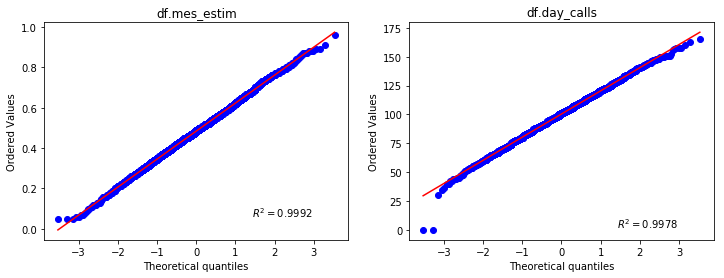

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sts.probplot(df.mes_estim, plot=plt, rvalue=True)
plt.title('df.mes_estim')
plt.subplot(122)
sts.probplot(df.day_calls, plot=plt, rvalue=True)
plt.title('df.day_calls');

___
# 8 V
Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

- [ ] Достигаемый уровень значимости < 0.05, то есть, отличие от нуля значения коэффицента Крамера значимо.
- [ ] Достигаемый уровень значимости > 0.05, то есть, отличие от нуля значения коэффицента Крамера незначимо.
- [X] Для вычисления коэффициента Крамера используется значение статистики xи-квадрат, на которую мы не можем положиться применительно к нашим данным.
- [ ] Коэффициент корреляции Крамера не может быть использован для сравнения связи этих двух признаков, потому что он используется для таблиц сопряженности, где каждая из размерностей больше двух. Если хотя бы одна из размерностей равна 2, то нужно использовать коэффициент корреляции Мэтьюса.

In [111]:
import proportions_hypotheses as p_s
ct = pd.crosstab(df.state, df.churn)
print(p_s.check_ct(ct))
print(p_s.cramers_corrected_stat(ct))

(3333, 0.00980392156862745)
(0.09956204952446517, 0.002296221552011188)


___
# 9 V
Вы прослушали большой курс и к текущему моменту обладете достаточными знаниями, чтобы попытаться самостоятельно выбрать нужный метод / инструмент / статистический критерий и сделать правильное заключение.

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

*Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2)!*

- [ ] Ни один из методов не показал значительного улучшения относительно других, о чем говорит групповой статистический критерий.
- [ ] treatment = 0 статистически значимо отличается от контрольной группы treatment = 1
- [X] treatment = 2 статистически значимо отличается от контрольной группы treatment = 1
- [ ] В дальнейшем телеком компании рекомендуется использовать и treatment = 0, и treatment = 2 для наибольшей эффективности удержения абонентов.
- [X] Отличие между treatment = 0 и treatment = 2 относительно влияния на уровень churn статистически незначимо.

In [37]:
treat1_df = df[df.treatment == 0]
treat2_df = df[df.treatment == 2]

Точечная оценка доли оттока

In [40]:
print(f'Control: {contr_df.churn.mean():.4f}')
print(f'Treatment 1: {treat1_df.churn.mean():.4f}')
print(f'Treatment 2: {treat2_df.churn.mean():.4f}')

Control: 0.1641
Treatment 1: 0.1456
Treatment 2: 0.1251


Добверительные интервалы для разнности долей в контрольной и тестовых группах.

In [55]:
p_s.proportions_diff_confint_ind(
    contr_df.churn, treat1_df.churn)

(-0.011583241590025106, 0.04848883584089464)

In [56]:
p_s.proportions_diff_confint_ind(
    contr_df.churn, treat2_df.churn)

(0.00961876673809212, 0.06832230885668503)

Проверка гипотез о статистической разности долей.  
- $H_0:$ доли оттока одинаковы
- $H_1:$ доли оттока отличаются. Двусторонняя альтернатива.

In [71]:
p_contr_t1 = p_s.proportions_diff_z_stat_ind(
    contr_df.churn, treat1_df.churn)[1]

In [72]:
p_contr_t2 = p_s.proportions_diff_z_stat_ind(
    contr_df.churn, treat2_df.churn)[1]

In [73]:
p_t1_t2 = p_s.proportions_diff_z_stat_ind(
    treat1_df.churn, treat2_df.churn)[1]

In [75]:
[p_contr_t1, p_contr_t2, p_t1_t2]

[0.2283311639045107, 0.009348084294451109, 0.1564246886050802]

In [96]:
msts.multipletests(
    [p_contr_t1, p_contr_t2, p_t1_t2],
    method='holm')

(array([False,  True, False]),
 array([0.31284938, 0.02804425, 0.31284938]),
 0.016952427508441503,
 0.016666666666666666)